<a href="https://colab.research.google.com/github/Arrow2004/credit_risk_predictor/blob/main/final_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

### Uploading all the cleaned datasets

In [51]:
# Read the cleaned CSV
df1 = pd.read_csv('/content/cleaned_application_metadata.csv')

# Get column names
print("Column Names:", df1.columns.tolist())

# Show first 5 rows
print(df1.head(5))

Column Names: ['customer_id', 'application_id', 'application_hour', 'application_day_of_week', 'account_open_year', 'preferred_contact', 'referral_code', 'account_status_code', 'random_noise_1', 'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app', 'paperless_billing', 'default']
   customer_id  application_id  application_hour  application_day_of_week  \
0        10000          620515                 5                        6   
1        10001          624978                 4                        2   
2        10002          564658                10                        3   
3        10003          621493                 7                        5   
4        10004          637785                 1                        2   

   account_open_year preferred_contact referral_code account_status_code  \
0               2013              Mail       REF0000               ACT-2   
1               2015             Phone       REF0000               ACT-3   
2           

In [52]:
# Read the cleaned CSV
df2 = pd.read_csv('/content/credit_history_cleaned.csv')

# Get column names
print("Column Names:", df2.columns.tolist())

# Show first 5 rows
print(df2.head(5))

Column Names: ['customer_id', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo', 'recent_inquiry_count', 'num_public_records', 'num_collections', 'account_diversity_index']
   customer_id  credit_score  num_credit_accounts  oldest_credit_line_age  \
0        10000           696                   14                    22.8   
1        10001           659                   13                     3.5   
2        10002           662                    3                     0.0   
3        10003           676                    8                     9.0   
4        10004           678                    7                     8.0   

   oldest_account_age_months  total_credit_limit  num_delinquencies_2yrs  \
0                      273.6              169100                       0   
1                       42.0               78200                       0   
2                       

In [53]:
# Read the cleaned CSV
df3 = pd.read_csv('/content/demographics_cleaned.csv')

# Get column names
print("Column Names:", df3.columns.tolist())

# Show first 5 rows
print(df3.head(5))

Column Names: ['customer_id', 'age', 'annual_income', 'employment_length', 'employment_type', 'education', 'marital_status', 'num_dependents']
   customer_id  age  annual_income  employment_length employment_type  \
0        10000   41          61800                2.2       Full Time   
1        10001   38          28600                7.0       Full Time   
2        10002   18          20700                0.8       Full Time   
3        10003   27          31400                4.8       Full Time   
4        10004   26          24600                5.2       Full Time   

     education marital_status  num_dependents  
0     Graduate        Married               2  
1  High School        Married               0  
2     Bachelor         Single               0  
3     Bachelor         Single               0  
4  High School         Single               0  


In [54]:
# Read the cleaned CSV
df4 = pd.read_csv('/content/financial_ratios_cleaned.csv')

# Get column names
print("Column Names:", df4.columns.tolist())

# Show first 5 rows
print(df4.head(5))

Column Names: ['customer_id', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization', 'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment', 'annual_debt_payment', 'loan_to_annual_income', 'total_debt_amount', 'monthly_free_cash_flow']
   customer_id  monthly_income  existing_monthly_debt  monthly_payment  \
0        10000         5150.00                 738.64           592.13   
1        10001         2383.33                 392.21          1013.86   
2        10002         1725.00                 204.07           317.81   
3        10003         2616.67                 288.71           234.52   
4        10004         2050.00                 248.77           334.81   

   debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
0                 0.258            0.258402                    0.115   
1                 0.590            

In [55]:
# Read the cleaned CSV
df5 = pd.read_csv('/content/geographic_data_cleaned.csv')

# Get column names
print("Column Names:", df5.columns.tolist())

# Show first 5 rows
print(df5.head(5))

Column Names: ['customer_id', 'state', 'regional_unemployment_rate', 'regional_median_income', 'regional_median_rent', 'housing_price_index', 'cost_of_living_index', 'previous_zip_code']
   customer_id         state  regional_unemployment_rate  \
0        10000          Ohio                         4.8   
1        10001  Pennsylvania                         4.4   
2        10002      Virginia                         3.9   
3        10003    California                         5.8   
4        10004    Washington                         5.8   

   regional_median_income  regional_median_rent  housing_price_index  \
0                   56000                1380.0                 91.0   
1                   61000                1510.0                 92.0   
2                   74000                1920.0                125.0   
3                   75000                1690.0                158.0   
4                   78000                1700.0                152.0   

   cost_of_living_i

In [56]:
# Read the cleaned CSV
df6 = pd.read_csv('/content/cleaned_loan_data.csv')

# Get column names
print("Column Names:", df6.columns.tolist())

# Show first 5 rows
print(df6.head(5))

Column Names: ['customer_id', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate', 'loan_purpose', 'loan_to_value_ratio', 'origination_channel', 'loan_officer_id', 'marketing_campaign']
   customer_id loan_type  loan_amount  loan_term  interest_rate  \
0        10000  personal      17700.0         36          12.50   
1        10001  mortgage     114000.0        180           6.83   
2        10002  personal       9300.0         36          13.99   
3        10003  personal       8700.0         48          13.26   
4        10004  personal       7200.0         24          10.77   

         loan_purpose  loan_to_value_ratio origination_channel  \
0  Debt Consolidation                0.000         Direct Mail   
1           Refinance                0.774              Branch   
2      Major Purchase                0.000              Online   
3             Medical                0.000              Online   
4  Debt Consolidation                0.000              Branch   

   loan_o

In [57]:
# check target and key presence
df1['default'].value_counts(normalize=True)
for df in [df1, df2, df3, df4, df5, df6]:
    print(df.columns.tolist(), df['customer_id'].nunique(), len(df))
    # check duplicates
    df1[df1.duplicated(['customer_id','application_id'], keep=False)]


['customer_id', 'application_id', 'application_hour', 'application_day_of_week', 'account_open_year', 'preferred_contact', 'referral_code', 'account_status_code', 'random_noise_1', 'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app', 'paperless_billing', 'default'] 89999 89999
['customer_id', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo', 'recent_inquiry_count', 'num_public_records', 'num_collections', 'account_diversity_index'] 89999 89999
['customer_id', 'age', 'annual_income', 'employment_length', 'employment_type', 'education', 'marital_status', 'num_dependents'] 89999 89999
['customer_id', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization', 'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment', 'annual_debt_p

In [58]:
merged_df = df1.copy()
merged_df = merged_df.merge(df2, on='customer_id', how='left')
merged_df = merged_df.merge(df3, on='customer_id', how='left')
merged_df = merged_df.merge(df4, on='customer_id', how='left')
merged_df = merged_df.merge(df5, on='customer_id', how='left')
merged_df = merged_df.merge(df6, on='customer_id', how='left')
print("Merged dataframe shape:", merged_df.shape)
print(merged_df.head())

Merged dataframe shape: (89999, 63)
   customer_id  application_id  application_hour  application_day_of_week  \
0        10000          620515                 5                        6   
1        10001          624978                 4                        2   
2        10002          564658                10                        3   
3        10003          621493                 7                        5   
4        10004          637785                 1                        2   

   account_open_year preferred_contact referral_code account_status_code  \
0               2013              Mail       REF0000               ACT-2   
1               2015             Phone       REF0000               ACT-3   
2               2020             Phone       REF0000               ACT-3   
3               2010             Email       REF0000                 A01   
4               2020              Mail       REF0000               ACT-3   

   random_noise_1  num_login_sessions  ...  

### Box-Plots and Checking the outliers

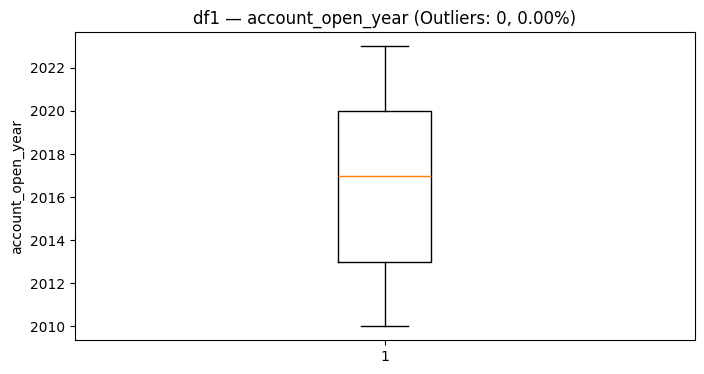

df1 · account_open_year → outliers = 0, 0.00% of non-null


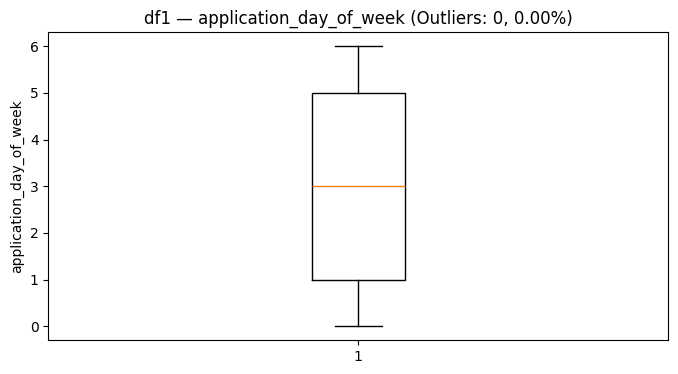

df1 · application_day_of_week → outliers = 0, 0.00% of non-null


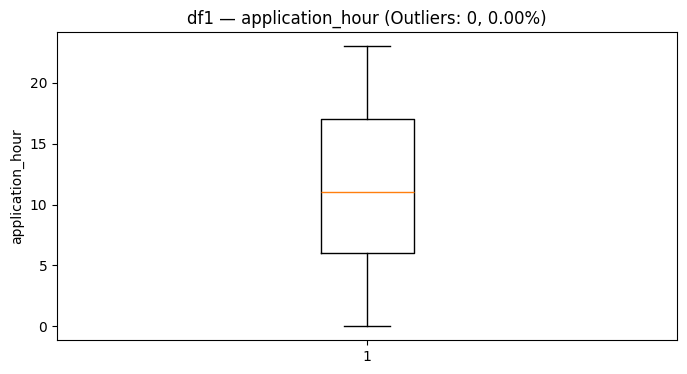

df1 · application_hour → outliers = 0, 0.00% of non-null


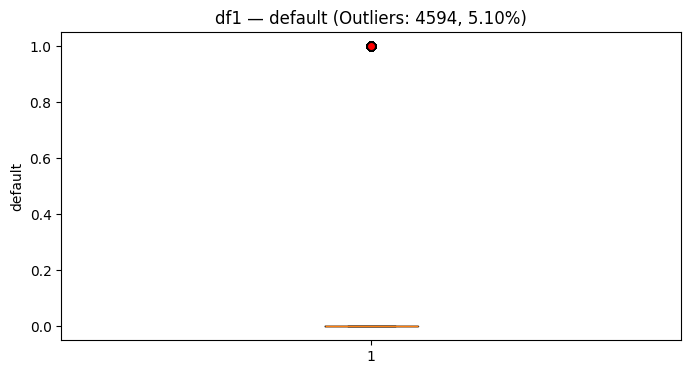

df1 · default → outliers = 4594, 5.10% of non-null


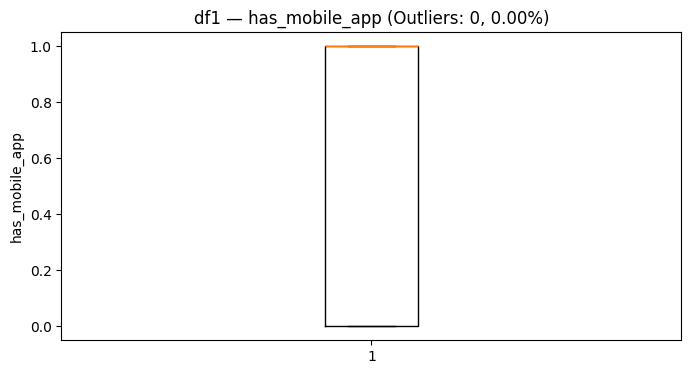

df1 · has_mobile_app → outliers = 0, 0.00% of non-null


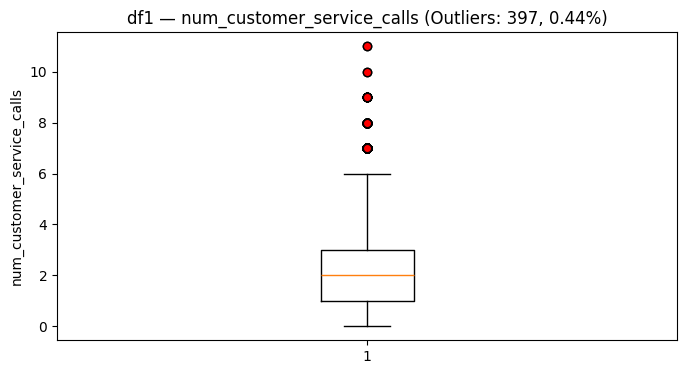

df1 · num_customer_service_calls → outliers = 397, 0.44% of non-null


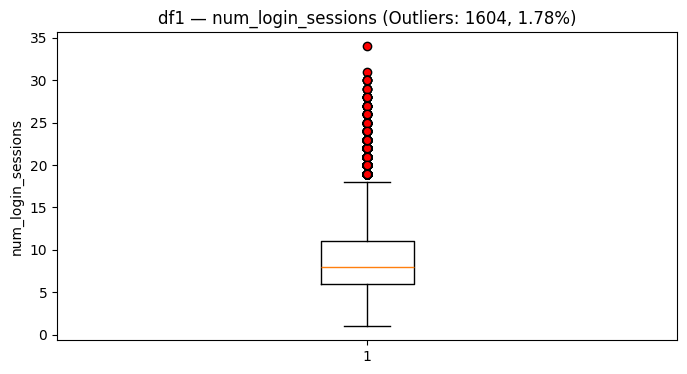

df1 · num_login_sessions → outliers = 1604, 1.78% of non-null


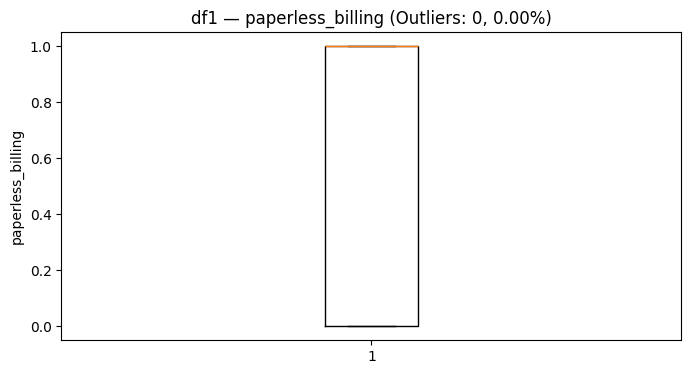

df1 · paperless_billing → outliers = 0, 0.00% of non-null


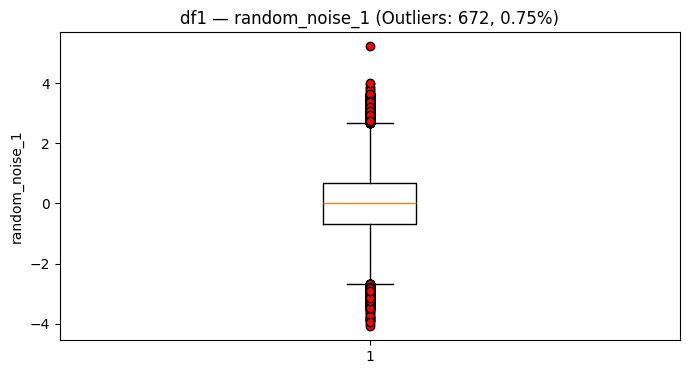

df1 · random_noise_1 → outliers = 672, 0.75% of non-null


In [59]:
skip_cols = [col for col in df1.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df1.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df1[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0
  plt.figure(figsize=(8,4))
  plt.boxplot(df1[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df1 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df1 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


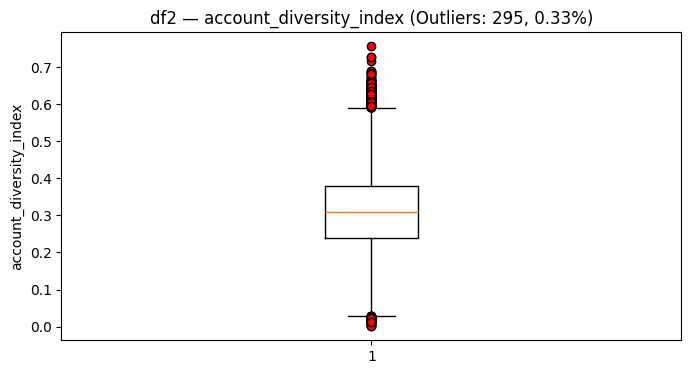

df2 · account_diversity_index → outliers = 295, 0.33% of non-null


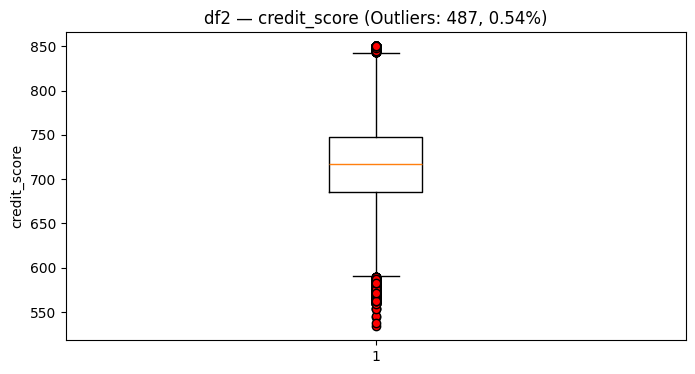

df2 · credit_score → outliers = 487, 0.54% of non-null


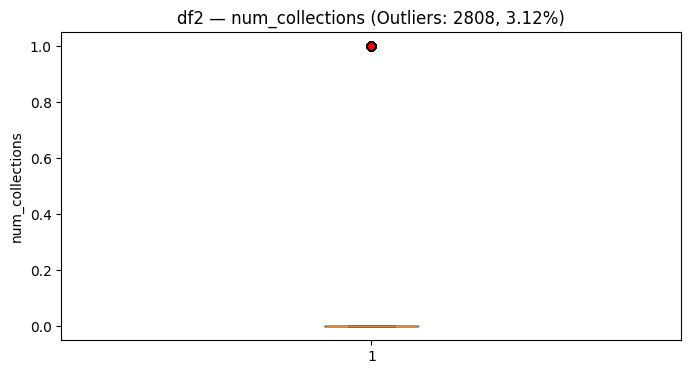

df2 · num_collections → outliers = 2808, 3.12% of non-null


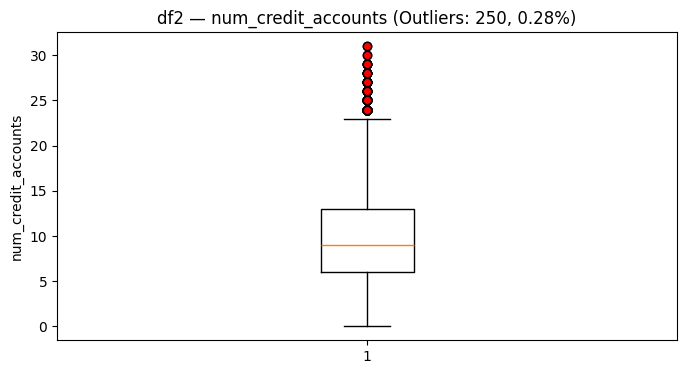

df2 · num_credit_accounts → outliers = 250, 0.28% of non-null


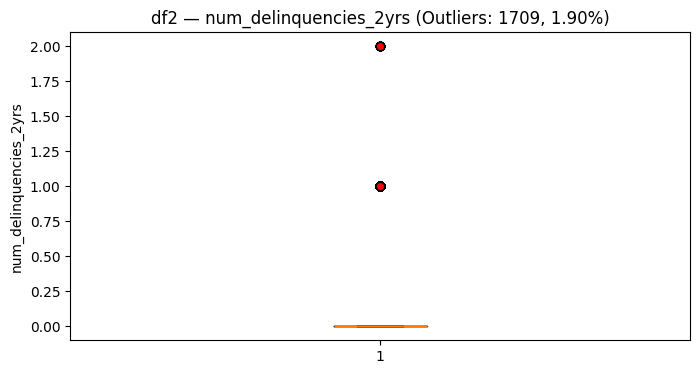

df2 · num_delinquencies_2yrs → outliers = 1709, 1.90% of non-null


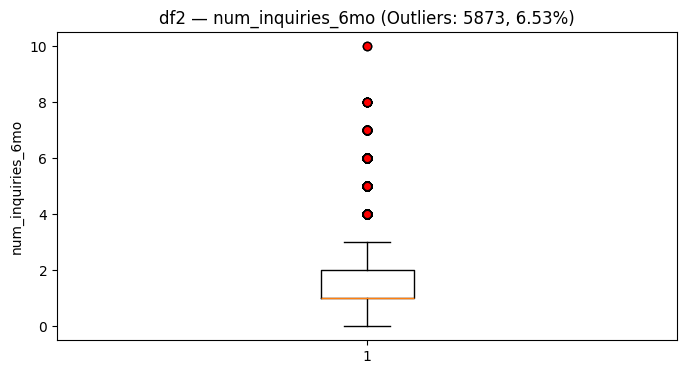

df2 · num_inquiries_6mo → outliers = 5873, 6.53% of non-null


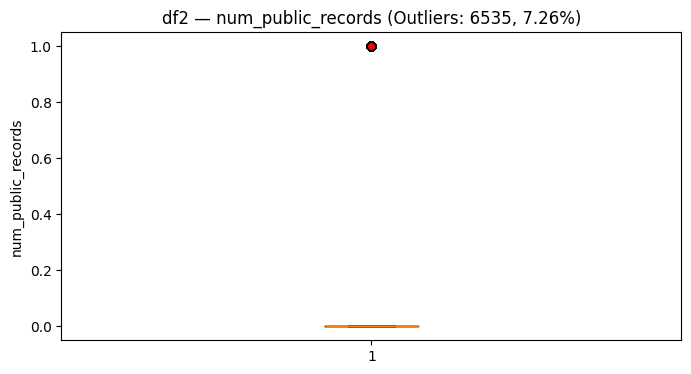

df2 · num_public_records → outliers = 6535, 7.26% of non-null


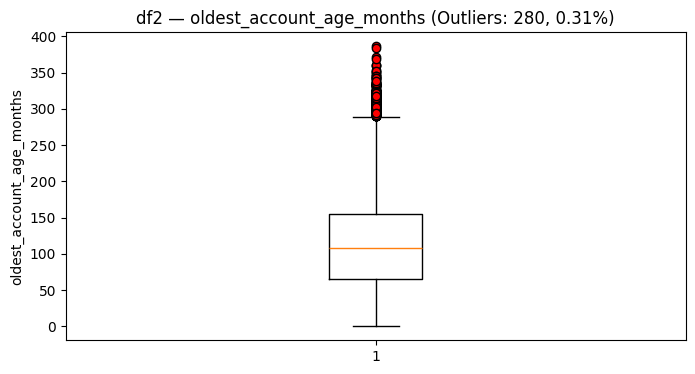

df2 · oldest_account_age_months → outliers = 280, 0.31% of non-null


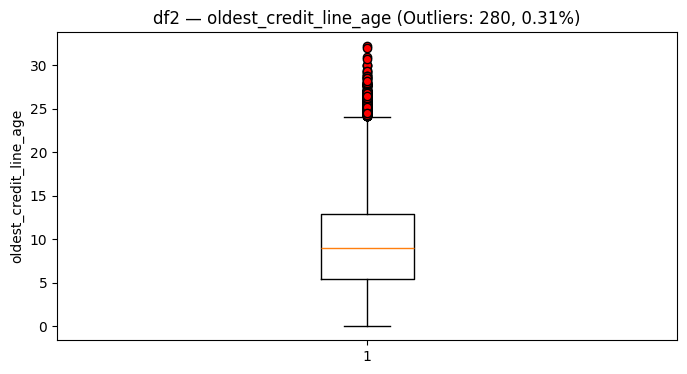

df2 · oldest_credit_line_age → outliers = 280, 0.31% of non-null


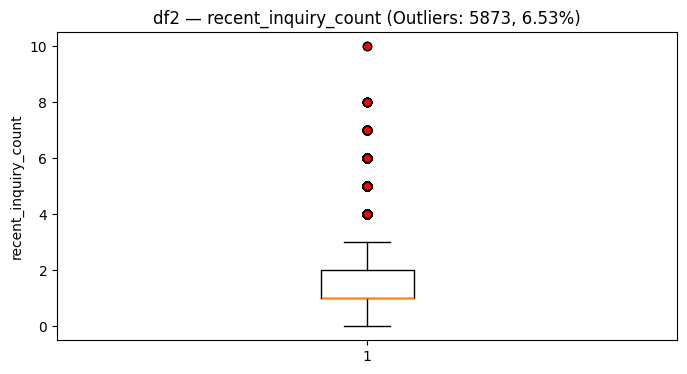

df2 · recent_inquiry_count → outliers = 5873, 6.53% of non-null


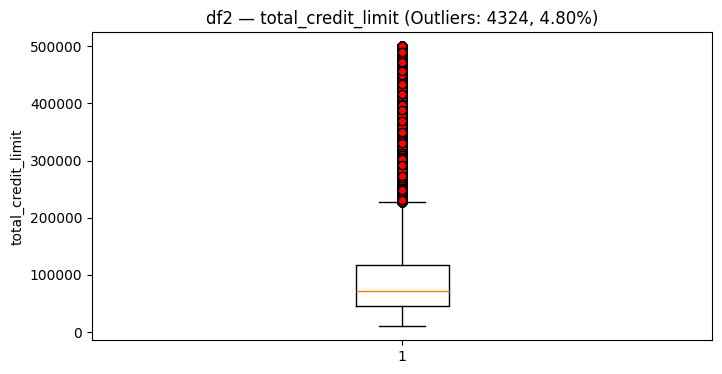

df2 · total_credit_limit → outliers = 4324, 4.80% of non-null


In [60]:
skip_cols = [col for col in df2.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df2.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)][col]
    outlier_count = len(outliers)
    total = df2[col].dropna().shape[0]
    outlier_pct = (outlier_count / total) * 100 if total > 0 else 0
    plt.figure(figsize=(8,4))
    plt.boxplot(df2[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
    plt.title(f'df2 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
    plt.ylabel(col)
    plt.show()

    print(f"df2 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


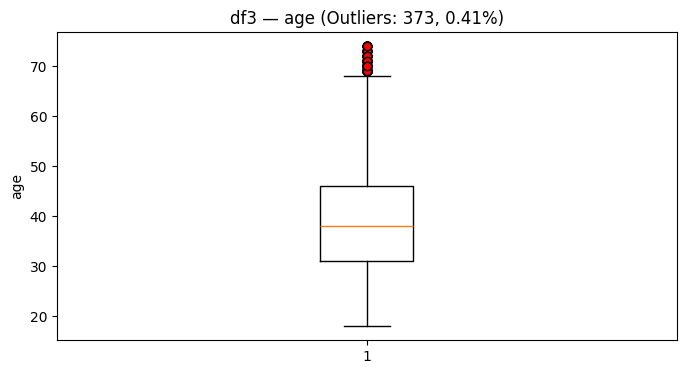

df3 · age → outliers = 373, 0.41% of non-null


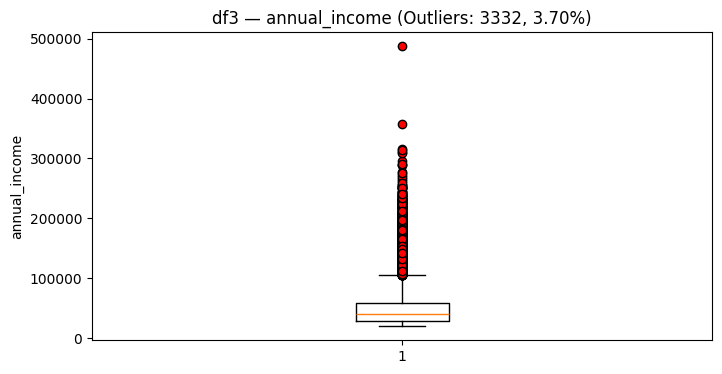

df3 · annual_income → outliers = 3332, 3.70% of non-null


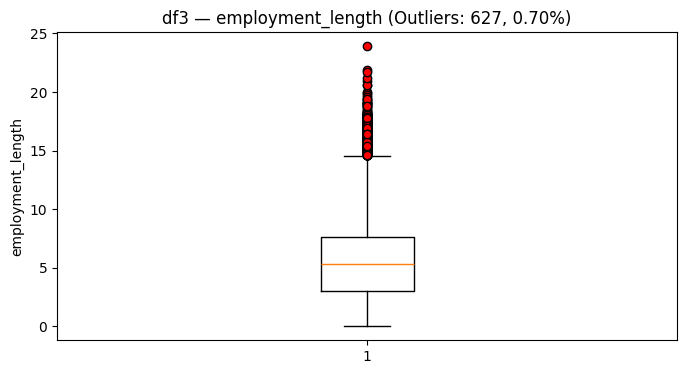

df3 · employment_length → outliers = 627, 0.70% of non-null


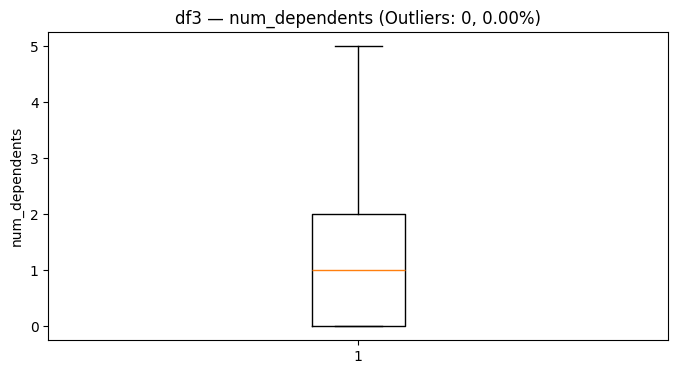

df3 · num_dependents → outliers = 0, 0.00% of non-null


In [61]:
skip_cols = [col for col in df3.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df3.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df3[col].quantile(0.25)
  Q3 = df3[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df3[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df3[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df3 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df3 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


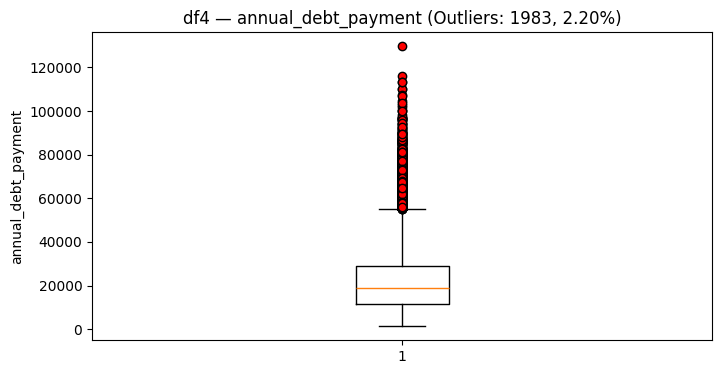

df4 · annual_debt_payment → outliers = 1983, 2.20% of non-null


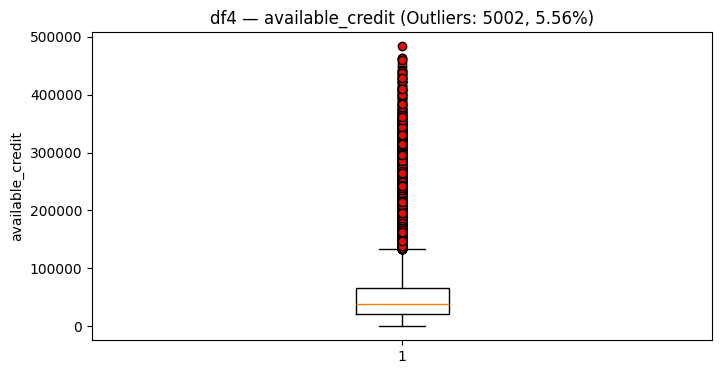

df4 · available_credit → outliers = 5002, 5.56% of non-null


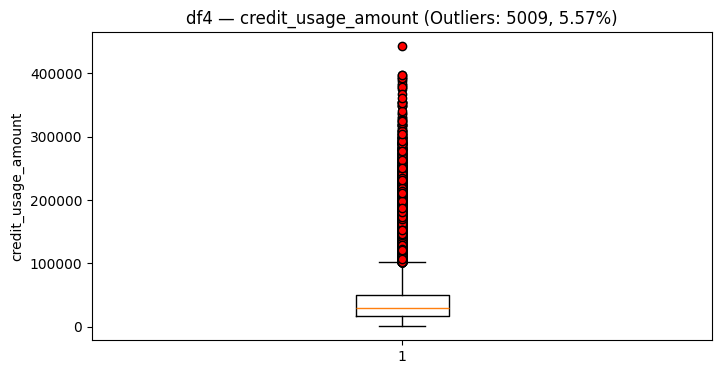

df4 · credit_usage_amount → outliers = 5009, 5.57% of non-null


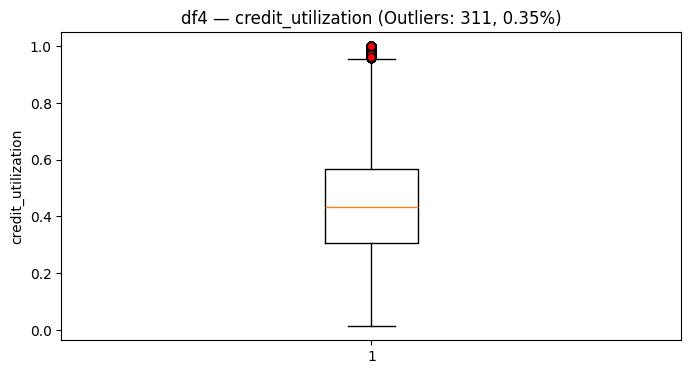

df4 · credit_utilization → outliers = 311, 0.35% of non-null


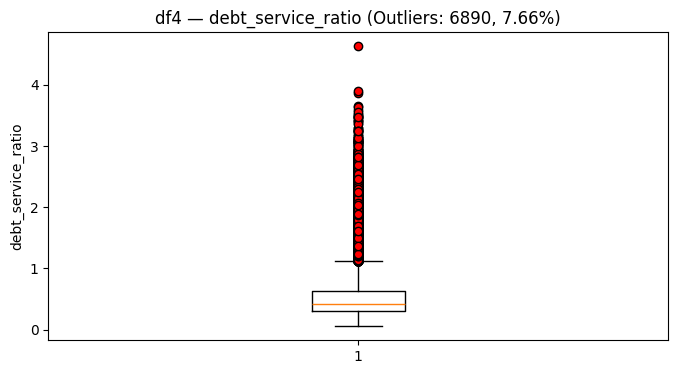

df4 · debt_service_ratio → outliers = 6890, 7.66% of non-null


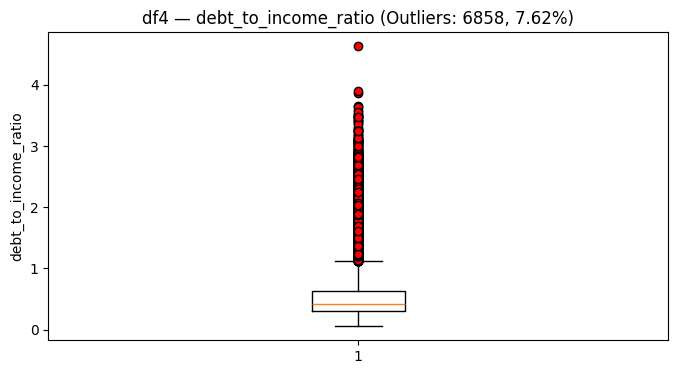

df4 · debt_to_income_ratio → outliers = 6858, 7.62% of non-null


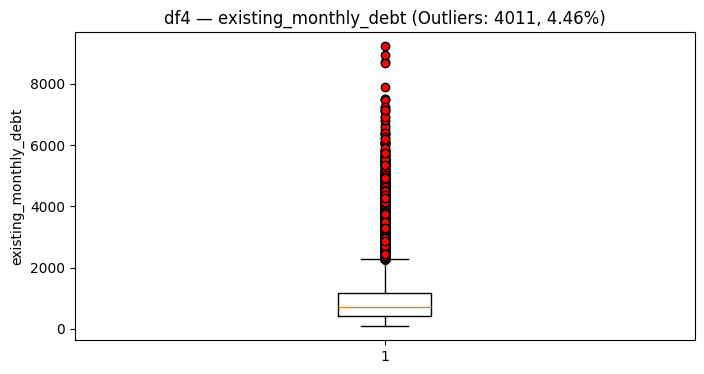

df4 · existing_monthly_debt → outliers = 4011, 4.46% of non-null


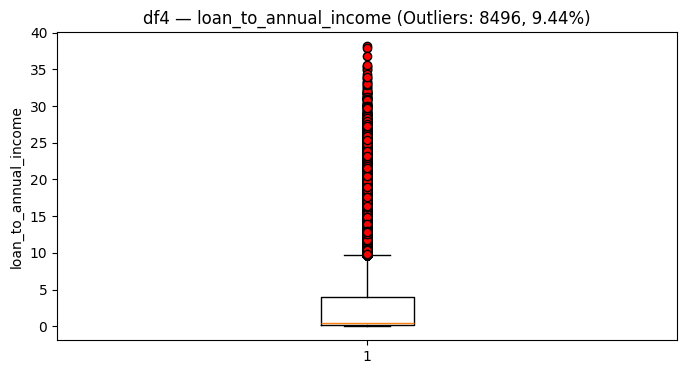

df4 · loan_to_annual_income → outliers = 8496, 9.44% of non-null


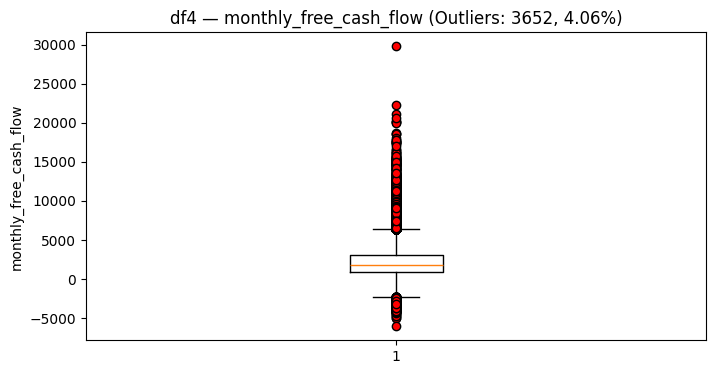

df4 · monthly_free_cash_flow → outliers = 3652, 4.06% of non-null


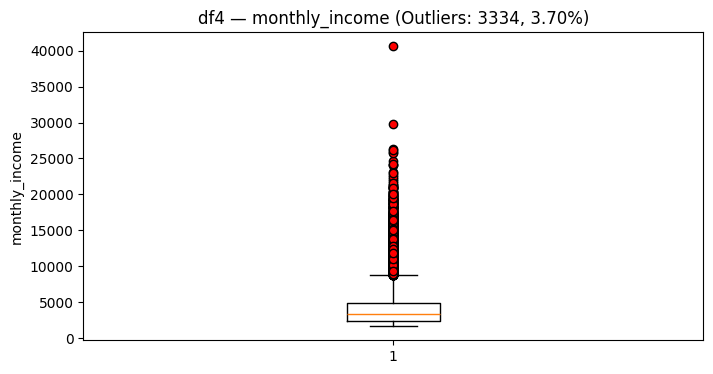

df4 · monthly_income → outliers = 3334, 3.70% of non-null


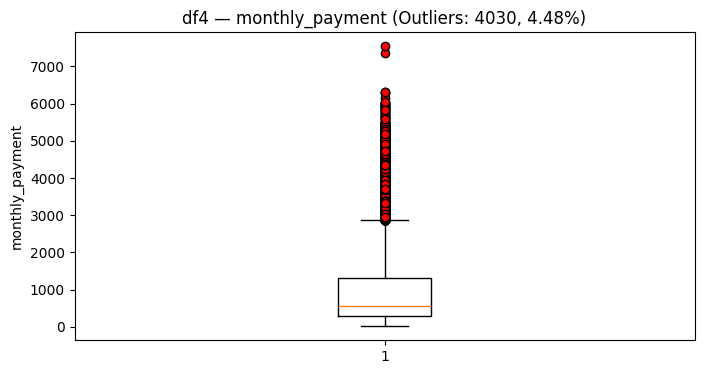

df4 · monthly_payment → outliers = 4030, 4.48% of non-null


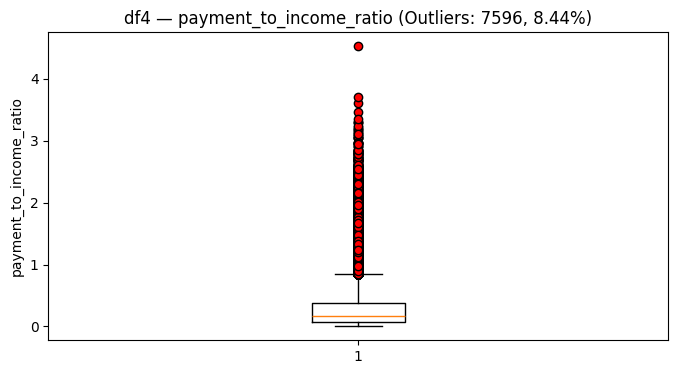

df4 · payment_to_income_ratio → outliers = 7596, 8.44% of non-null


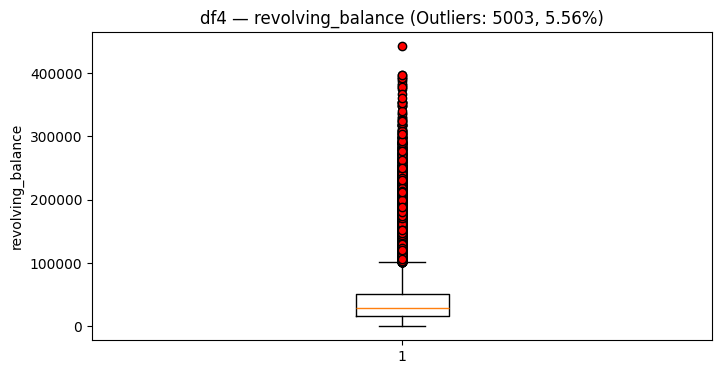

df4 · revolving_balance → outliers = 5003, 5.56% of non-null


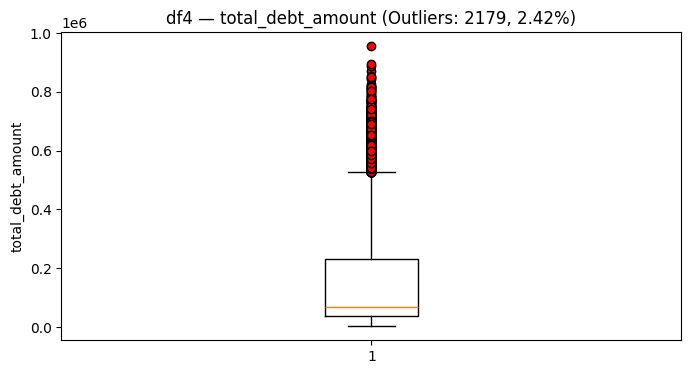

df4 · total_debt_amount → outliers = 2179, 2.42% of non-null


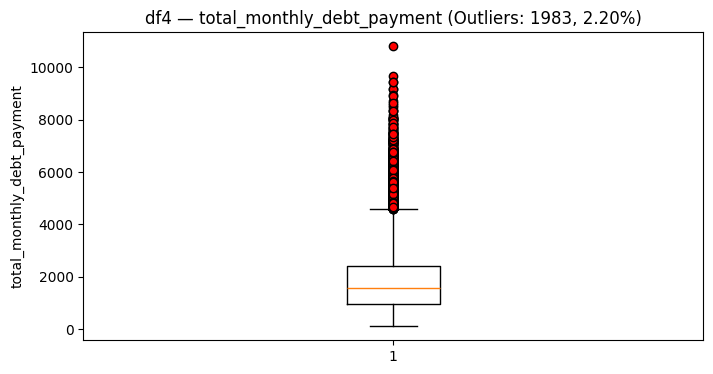

df4 · total_monthly_debt_payment → outliers = 1983, 2.20% of non-null


In [62]:
skip_cols = [col for col in df4.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df4.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df4[col].quantile(0.25)
  Q3 = df4[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df4[(df4[col] < lower_bound) | (df4[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df4[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df4[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df4 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df4 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


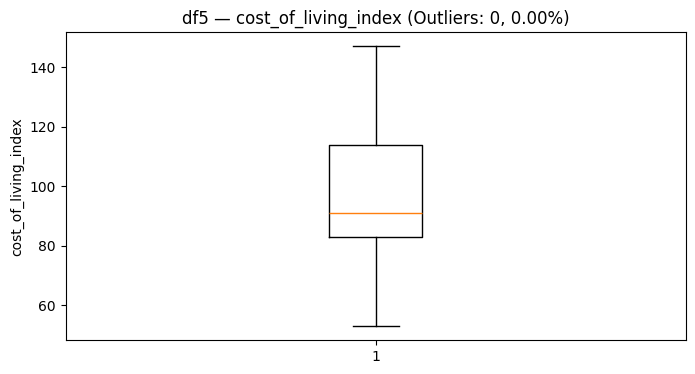

df5 · cost_of_living_index → outliers = 0, 0.00% of non-null


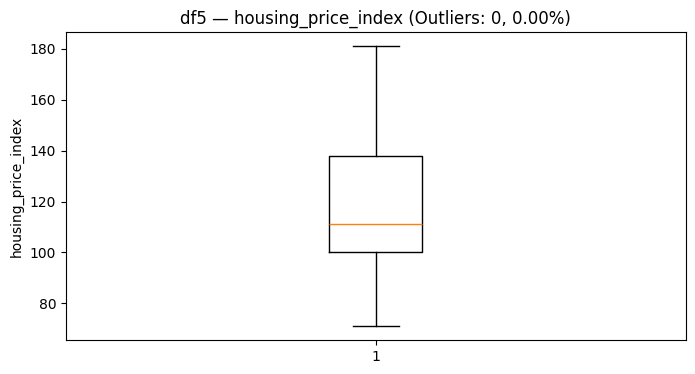

df5 · housing_price_index → outliers = 0, 0.00% of non-null


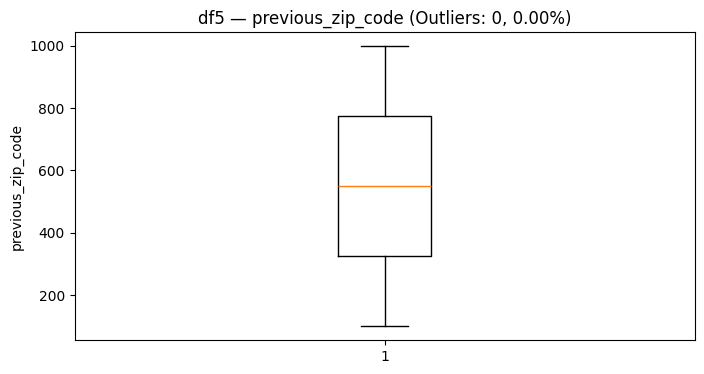

df5 · previous_zip_code → outliers = 0, 0.00% of non-null


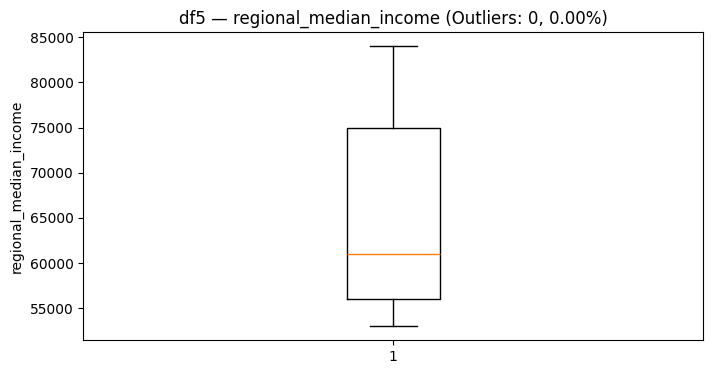

df5 · regional_median_income → outliers = 0, 0.00% of non-null


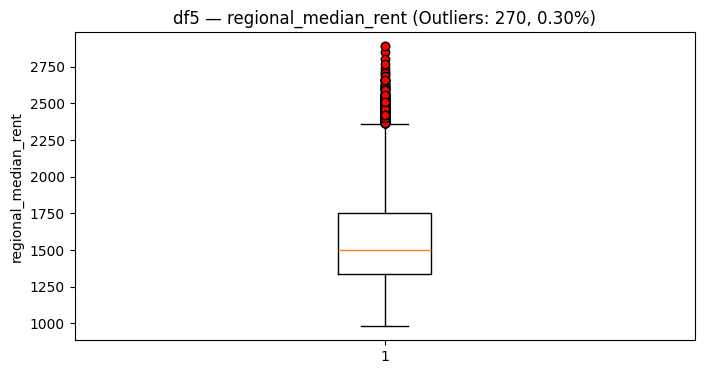

df5 · regional_median_rent → outliers = 270, 0.30% of non-null


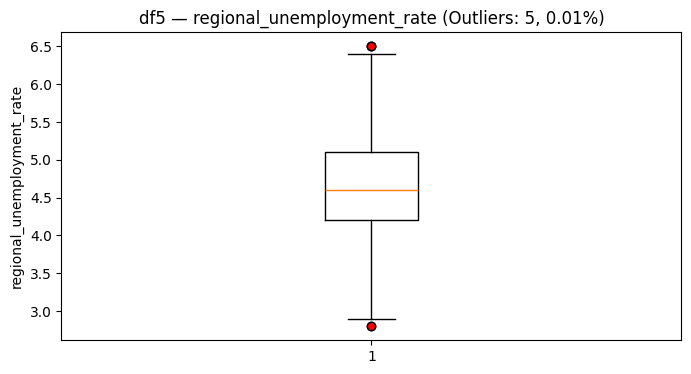

df5 · regional_unemployment_rate → outliers = 5, 0.01% of non-null


In [63]:
skip_cols = [col for col in df5.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df5.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df5[col].quantile(0.25)
  Q3 = df5[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df5[(df5[col] < lower_bound) | (df5[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df5[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df5[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df5 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df5 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


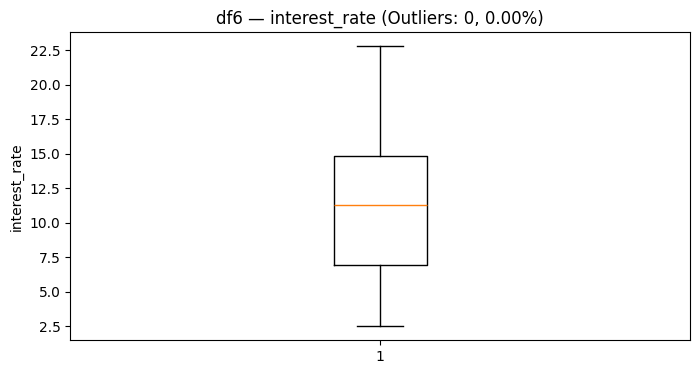

df6 · interest_rate → outliers = 0, 0.00% of non-null


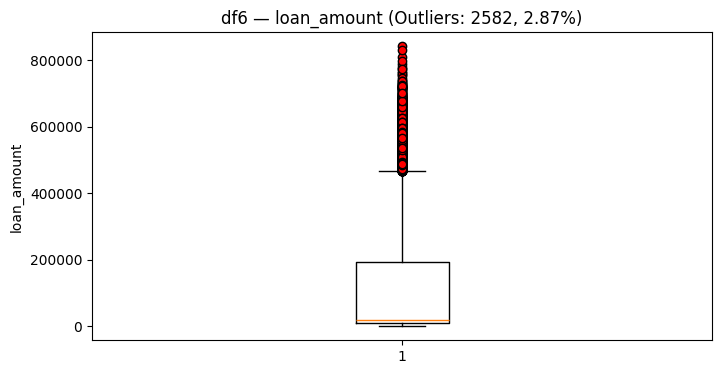

df6 · loan_amount → outliers = 2582, 2.87% of non-null


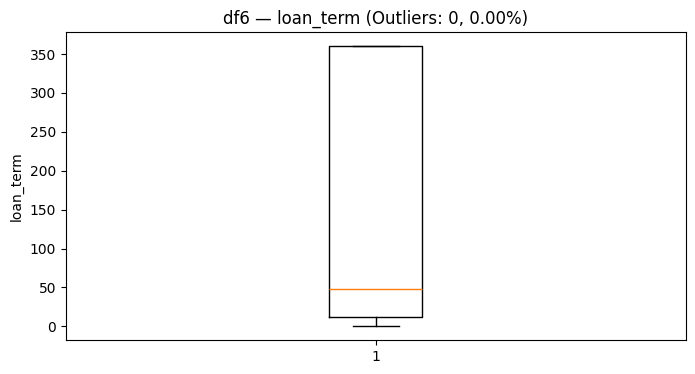

df6 · loan_term → outliers = 0, 0.00% of non-null


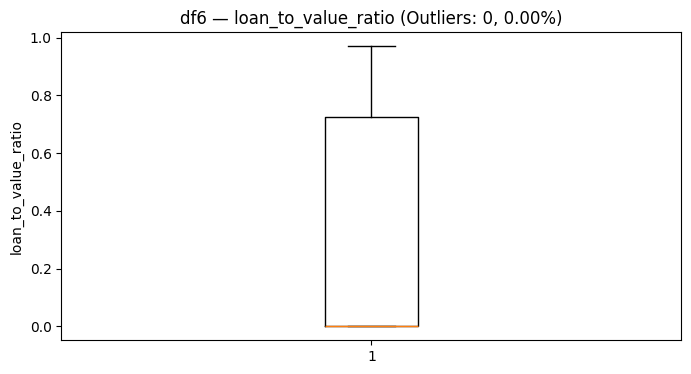

df6 · loan_to_value_ratio → outliers = 0, 0.00% of non-null


In [64]:
skip_cols = [col for col in df6.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df6.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df6[col].quantile(0.25)
  Q3 = df6[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df6[(df6[col] < lower_bound) | (df6[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df6[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df6[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df6 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df6 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


### Feature Engineering

In [ ]:
missing_data = merged_df.isnull().sum()
pd.set_option('display.max_rows', None)  # missing data yo'qligini yana bir marta tekshirdik
print(missing_data)

customer_id                   0
application_id                0
application_hour              0
application_day_of_week       0
account_open_year             0
preferred_contact             0
referral_code                 0
account_status_code           0
random_noise_1                0
num_login_sessions            0
num_customer_service_calls    0
has_mobile_app                0
paperless_billing             0
default                       0
credit_score                  0
num_credit_accounts           0
oldest_credit_line_age        0
oldest_account_age_months     0
total_credit_limit            0
num_delinquencies_2yrs        0
num_inquiries_6mo             0
recent_inquiry_count          0
num_public_records            0
num_collections               0
account_diversity_index       0
age                           0
annual_income                 0
employment_length             0
employment_type               0
education                     0
marital_status                0
num_depe

In [ ]:
current_year = 2025
merged_df['account_age'] = current_year - merged_df['account_open_year']
merged_df['application_hour'] = merged_df['application_hour'].astype(int)
merged_df['application_day_of_week'] = merged_df['application_day_of_week'].astype(int)

In [ ]:
merged_df['total_debt_burden'] = (merged_df['existing_monthly_debt'] + merged_df['monthly_payment']) / merged_df['monthly_income']

merged_df['loan_to_annual_income_ratio'] = merged_df['loan_amount'] / merged_df['annual_income']

merged_df['payment_to_income_ratio'] = merged_df['monthly_payment'] / merged_df['monthly_income']

merged_df['credit_usage_ratio'] = merged_df['credit_usage_amount'] / (merged_df['available_credit'] + merged_df['credit_usage_amount'])

In [ ]:
merged_df['age_income_interaction'] = merged_df['age'] * merged_df['annual_income']

merged_df['credit_risk_interaction'] = merged_df['num_credit_accounts'] * merged_df['credit_utilization']

merged_df['tech_adoption_score'] = merged_df['has_mobile_app'] + merged_df['paperless_billing']

In [ ]:
merged_df['recent_delinquency_flag'] = (merged_df['num_delinquencies_2yrs'] > 0).astype(int)
merged_df['public_record_flag'] = (merged_df['num_public_records'] > 0).astype(int)
merged_df['collections_flag'] = (merged_df['num_collections'] > 0).astype(int)
merged_df['high_credit_usage_flag'] = (merged_df['credit_utilization'] > 0.8).astype(int)

In [ ]:
merged_df['income_vs_regional_median'] = merged_df['annual_income'] / merged_df['regional_median_income']
merged_df['payment_vs_regional_rent'] = merged_df['monthly_payment'] / merged_df['regional_median_rent']
merged_df['loan_to_hpi_ratio'] = merged_df['loan_amount'] / merged_df['housing_price_index']  # rough leverage measure

In [ ]:
# Numeric bins
merged_df['age_bin'] = pd.cut(merged_df['age'], bins=[18,25,35,50,65,100], labels=['18-25','26-35','36-50','51-65','65+'])
merged_df['credit_score_bin'] = pd.cut(merged_df['credit_score'], bins=[300,580,670,740,800,850], labels=['Poor','Fair','Good','Very Good','Excellent'])
merged_df['annual_income_bin'] = pd.qcut(merged_df['annual_income'], q=5, labels=['Very Low','Low','Medium','High','Very High'])

# One-hot encode categorical columns
categorical_cols = ['employment_type','education','marital_status','state','loan_type','loan_purpose','origination_channel','marketing_campaign','preferred_contact','account_status_code','referral_code']
merged_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)


### Datamiz Modeling ga tayyormi tekshiramiz

In [ ]:
print(merged_df.shape)

(89999, 7945)


In [ ]:
merged_df.to_csv("merged_df.csv", index=False)

In [ ]:
print(merged_df['default'].value_counts())
print(merged_df['default'].value_counts(normalize=True))


default
0    85405
1     4594
Name: count, dtype: int64
default
0    0.948955
1    0.051045
Name: proportion, dtype: float64


In [ ]:
print(merged_df.dtypes)

customer_id                           int64
application_id                        int64
application_hour                      int64
application_day_of_week               int64
account_open_year                     int64
random_noise_1                      float64
num_login_sessions                    int64
num_customer_service_calls            int64
has_mobile_app                        int64
paperless_billing                     int64
default                               int64
credit_score                          int64
num_credit_accounts                   int64
oldest_credit_line_age              float64
oldest_account_age_months           float64
total_credit_limit                    int64
num_delinquencies_2yrs                int64
num_inquiries_6mo                     int64
recent_inquiry_count                  int64
num_public_records                    int64
num_collections                       int64
account_diversity_index             float64
age                             

In [ ]:
print(merged_df.describe())

        customer_id  application_id  application_hour  \
count  89999.000000    89999.000000      89999.000000   
mean   54999.000000   594846.054934         11.475539   
std    25980.617776    28850.062092          6.901162   
min    10000.000000   544794.000000          0.000000   
25%    32499.500000   569870.500000          6.000000   
50%    54999.000000   594901.000000         11.000000   
75%    77498.500000   619775.500000         17.000000   
max    99998.000000   644793.000000         23.000000   

       application_day_of_week  account_open_year  random_noise_1  \
count             89999.000000       89999.000000    89999.000000   
mean                  2.993755        2016.497517        0.000091   
std                   2.005926           4.020588        0.997134   
min                   0.000000        2010.000000       -4.091319   
25%                   1.000000        2013.000000       -0.671945   
50%                   3.000000        2017.000000        0.003168   
75%

In [ ]:
numeric_cols = merged_df.select_dtypes(include=['int64','float64']).columns
print(merged_df[numeric_cols].corr()['default'].sort_values(ascending=False))

default                        1.000000
debt_to_income_ratio           0.215432
debt_service_ratio             0.215430
total_debt_burden              0.215425
payment_to_income_ratio        0.215016
loan_to_annual_income          0.164835
loan_to_annual_income_ratio    0.164835
monthly_payment                0.122945
payment_vs_regional_rent       0.119103
loan_amount                    0.086324
loan_to_hpi_ratio              0.084239
total_debt_amount              0.066458
credit_usage_ratio             0.059582
credit_utilization             0.059582
loan_to_value_ratio            0.050485
loan_term                      0.047907
annual_debt_payment            0.042604
total_monthly_debt_payment     0.042604
high_credit_usage_flag         0.041784
recent_delinquency_flag        0.039121
num_delinquencies_2yrs         0.039116
public_record_flag             0.037241
num_public_records             0.037241
has_mobile_app                 0.031713
cost_of_living_index           0.009922


### Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# bizani target "default"
y = merged_df['default']

# Feature larimiz: drop customer_id, application_id, and target
X = merged_df.drop(columns=['default', 'customer_id', 'application_id'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))

(71999, 7942) (18000, 7942)
default
0    0.948958
1    0.051042
Name: proportion, dtype: float64


In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)

# parametrlarimizni set qilamiz
params = {'objective': 'binary',
          'metric': 'auc',
          'boosting_type': 'gbdt',
          'learning_rate': 0.05,
          'num_leaves': 31,
          'min_data_in_leaf': 20,
          'feature_fraction': 0.8,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'lambda_l1': 0.1,
          'lambda_l2': 0.1,
          'is_unbalance': True,
          'verbosity': -1,
          'seed': 42}

In [ ]:
from lightgbm import early_stopping, log_evaluation
cv_results = lgb.cv(params, train_data, num_boost_round=1000, nfold=5, stratified=True, shuffle=True,
                    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=50)])
print("CV results keys:", cv_results.keys())

best_round = len(cv_results['valid auc-mean'])
print("Best num_boost_round from CV:", best_round)

model = lgb.train(params,train_data,num_boost_round=best_round)
y_pred_test = model.predict(X_test, num_iteration=best_round)
test_auc = roc_auc_score(y_test, y_pred_test)
print(f"Final Test AUC: {test_auc:.4f}")

Training until validation scores don't improve for 50 rounds
[50]	valid's auc: 0.79938 + 0.0071574
[100]	valid's auc: 0.799566 + 0.00686583
Early stopping, best iteration is:
[88]	valid's auc: 0.800175 + 0.00713774
CV results keys: dict_keys(['valid auc-mean', 'valid auc-stdv'])
Best num_boost_round from CV: 88
Final Test AUC: 0.8029


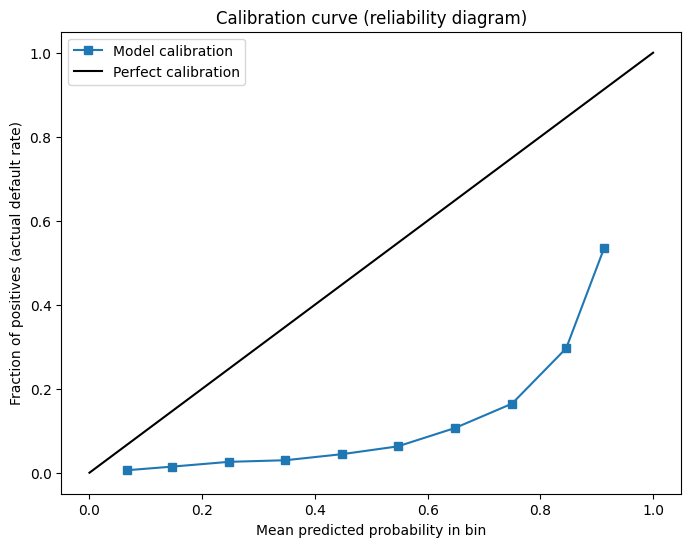

Brier score: 0.1541
   pd_band  count  defaults  avg_predicted_pd  actual_default_rate
0        0   1800         8          0.053755             0.004444
1        1   1800        16          0.092919             0.008889
2        2   1800        31          0.136510             0.017222
3        3   1800        26          0.188292             0.014444
4        4   1800        48          0.247229             0.026667
5        5   1800        53          0.315204             0.029444
6        6   1800        67          0.395437             0.037222
7        7   1800        86          0.493972             0.047778
8        8   1800       169          0.619705             0.093889
9        9   1800       415          0.792735             0.230556


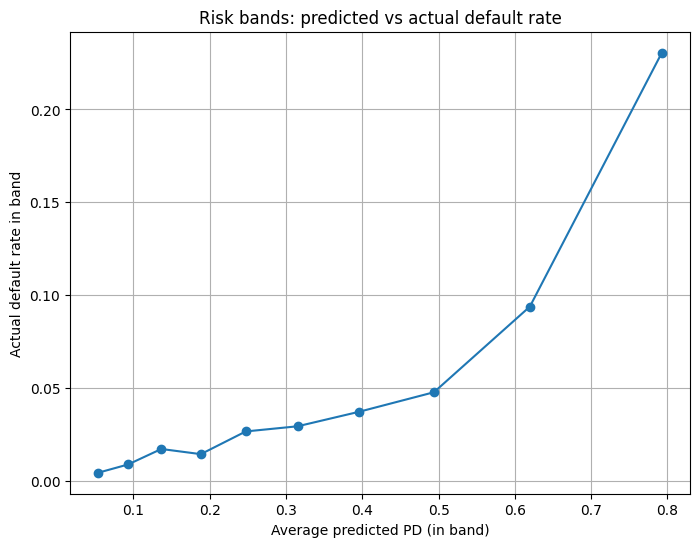

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# 1. Get predicted probabilities on test set from your final model
y_pred_prob = model.predict(X_test, num_iteration=best_round)

# 2. Calibration curve (reliability diagram)
# Use sklearn.calibration.calibration_curve to compute real vs predicted
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10, strategy='uniform')

# 3. Plot calibration
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, "s-", label="Model calibration")
plt.plot([0, 1], [0, 1], "k-", label="Perfect calibration")
plt.xlabel("Mean predicted probability in bin")
plt.ylabel("Fraction of positives (actual default rate)")
plt.title("Calibration curve (reliability diagram)")
plt.legend()
plt.show()

# 4. Brier score (optional, a metric for calibration)
brier = brier_score_loss(y_test, y_pred_prob)
print(f"Brier score: {brier:.4f}")

# 5. Risk‑banding (PD buckets)
# Create bins (for example deciles)
test_df = pd.DataFrame({"y_true": y_test, "y_prob": y_pred_prob})

# Create decile bands based on predicted probability
test_df["pd_band"] = pd.qcut(test_df["y_prob"], q=10, labels=False)  # 0 to 9

# For each band, compute the actual default rate
band_summary = test_df.groupby("pd_band").agg(count = ("y_true", "count"), defaults = ("y_true", "sum"),avg_predicted_pd = ("y_prob", "mean")).reset_index()

band_summary["actual_default_rate"] = band_summary["defaults"] / band_summary["count"]

print(band_summary)

# 6. Visualize PD band vs actual default rate
plt.figure(figsize=(8, 6))
plt.plot(band_summary["avg_predicted_pd"], band_summary["actual_default_rate"], marker="o")
plt.xlabel("Average predicted PD (in band)")
plt.ylabel("Actual default rate in band")
plt.title("Risk bands: predicted vs actual default rate")
plt.grid(True)
plt.show()

In [ ]:
#Prepare features
X_eval = evaluation_df.drop(columns=['customer_id', 'application_id'], errors='ignore')

# Predict PD
eval_pred_pd = model.predict(X_eval, num_iteration=best_round)
evaluation_df["predicted_pd"] = eval_pred_pd

# Classification threshold
threshold = 0.5
evaluation_df["predicted_default"] = (evaluation_df["predicted_pd"] >= threshold).astype(int)

# Save results
evaluation_df.to_csv("evaluation_with_predictions.csv", index=False)

print(evaluation_df.head())

Evaluation

In [ ]:
import pandas as pd
evaluation_df = pd.read_csv("/content/final_data_ev.csv")
print(evaluation_df.shape)
print(evaluation_df.head())

(10001, 62)
   customer_id  application_id  application_hour  application_day_of_week  \
0       100000          618540                21                        0   
1       100001          589784                 9                        6   
2       100002          554219                10                        4   
3       100003          613505                 3                        4   
4       100004          571219                 9                        1   

   account_open_year preferred_contact referral_code account_status_code  \
0               2018             Email       REF0000               ACT-1   
1               2021             Phone       REF0000               ACT-1   
2               2019             Phone       REF0000               ACT-1   
3               2011             Email       REF0000               ACT-2   
4               2021             Email       REF0000               ACT-1   

   random_noise_1  num_login_sessions  ...  previous_zip_code   loan

In [ ]:
X_eval = evaluation_df
current_year = 2025
X_eval['account_age'] = current_year - X_eval['account_open_year']
X_eval['application_hour'] = X_eval['application_hour'].astype(int)
X_eval['application_day_of_week'] = X_eval['application_day_of_week'].astype(int)
X_eval['total_debt_burden'] = (X_eval['existing_monthly_debt'] + X_eval['monthly_payment']) / X_eval['monthly_income']

X_eval['loan_to_annual_income_ratio'] = X_eval['loan_amount'] / X_eval['annual_income']

X_eval['payment_to_income_ratio'] = X_eval['monthly_payment'] / X_eval['monthly_income']

X_eval['credit_usage_ratio'] = X_eval['credit_usage_amount'] / (X_eval['available_credit'] + X_eval['credit_usage_amount'])
X_eval['age_income_interaction'] = X_eval['age'] * X_eval['annual_income']


X_eval['credit_risk_interaction'] = X_eval['num_credit_accounts'] * X_eval['credit_utilization']

X_eval['tech_adoption_score'] = X_eval['has_mobile_app'] + X_eval['paperless_billing']
X_eval['recent_delinquency_flag'] = (X_eval['num_delinquencies_2yrs'] > 0).astype(int)
X_eval['public_record_flag'] = (X_eval['num_public_records'] > 0).astype(int)
X_eval['collections_flag'] = (X_eval['num_collections'] > 0).astype(int)
X_eval['high_credit_usage_flag'] = (X_eval['credit_utilization'] > 0.8).astype(int)
X_eval['income_vs_regional_median'] = X_eval['annual_income'] / X_eval['regional_median_income']
X_eval['payment_vs_regional_rent'] = X_eval['monthly_payment'] / X_eval['regional_median_rent']
X_eval['loan_to_hpi_ratio'] = X_eval['loan_amount'] / X_eval['housing_price_index']  # rough leverage measure
# Numeric bins
X_eval['age_bin'] = pd.cut(X_eval['age'], bins=[18,25,35,50,65,100], labels=['18-25','26-35','36-50','51-65','65+'])
X_eval['credit_score_bin'] = pd.cut(X_eval['credit_score'], bins=[300,580,670,740,800,850], labels=['Poor','Fair','Good','Very Good','Excellent'])
X_eval['annual_income_bin'] = pd.qcut(X_eval['annual_income'], q=5, labels=['Very Low','Low','Medium','High','Very High'])

# One-hot encode categorical columns
categorical_cols = ['employment_type','education','marital_status','state','loan_type','loan_purpose','origination_channel','marketing_campaign','preferred_contact','account_status_code','referral_code']
X_eval = pd.get_dummies(X_eval, columns=categorical_cols, drop_first=True)
eval_pred_pd = model.predict(X_eval, num_iteration=best_round,predict_disable_shape_check=True)
evaluation_df["predicted_pd"] = eval_pred_pd

threshold = 0.55
evaluation_df["predicted_default"] = (evaluation_df["predicted_pd"] >= threshold).astype(int)

evaluation_df.to_csv("evaluation_with_predictions.csv", index=False)

print(evaluation_df[['customer_id','predicted_default','predicted_pd']])

       customer_id  predicted_default  predicted_pd
0           100000                  1      0.890376
1           100001                  1      0.901689
2           100002                  1      0.890861
3           100003                  1      0.896600
4           100004                  1      0.921643
5           100005                  1      0.906905
6           100006                  1      0.929477
7           100007                  1      0.905375
8           100008                  1      0.916587
9           100009                  1      0.887108
10          100010                  1      0.908799
11          100011                  1      0.890376
12          100012                  1      0.905375
13          100013                  1      0.908799
14          100014                  1      0.903016
15          100015                  1      0.924292
16          100016                  1      0.901689
17          100017                  1      0.913345
18          